# Sprechstile - maschinelle Eigenschaften 

Irina Anghelescu


**-Imports**

In [3]:
import pandas as pd #library for data analysis - for example for generating the different visualizations (diagrams, charts)
import os #for interacting with the operating system - for example reading files from our computer, finding the path  
import matplotlib.pyplot as plt #for generating boxplots 
import seaborn as sns #another data visualization library based on matplotlib
from scipy.stats import pearsonr #Pearson correlation coefficient and p-value for testing non-correlation
import numpy as np #module for using mathematical and numerical functions 

**-Read the segments and transform them into a data frame** 
(The segments have been labeled in advance with Speechalyzer, they have about the right size to carry an emotional expression, 3-7 seconds. The labels show the valence of the segment, on a scale from 1 to 5, where 1=negative, 5=positive)

In [4]:
df=pd.read_csv (r'C:\Users\user\Desktop\MA Sprache und Kommunikation\2_Semester\Sprechstile\Speechalyzer-master\labels.txt', sep=' ', header=None)

cols=['file', 'valence'] #define the columns of the data frame

df.columns = cols

df=df.set_index('file')

df.index = df.index.to_series().apply(lambda x: os.path.basename(x)) #change the relative path into an absolute path

df.head(5)

,valence
file,
Angehelescu_16_seg_00000000.wav,4.0
Angehelescu_16_seg_00000001.wav,4.0
Angehelescu_16_seg_00000002.wav,4.0
Angehelescu_16_seg_00000003.wav,4.0
Angehelescu_16_seg_00000004.wav,3.0


**- Different visualizations of the data**

In [5]:
df.valence.value_counts()

3.0    17
4.0    17
2.0     7
5.0     2
1.0     1
Name: valence, dtype: int64

Default/Standard visualizations

<AxesSubplot:xlabel='file'>

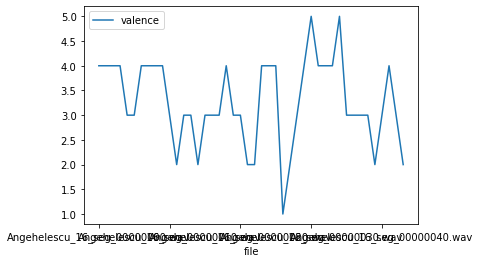

In [6]:
df.plot()

<AxesSubplot:>

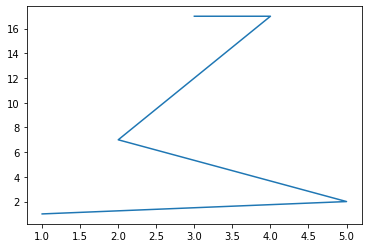

In [7]:
df.valence.value_counts().plot()

Bar diagram 

<AxesSubplot:>

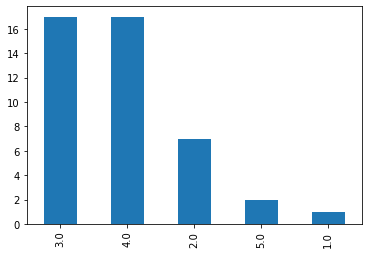

In [8]:
df.valence.value_counts().plot(kind='bar')

Pie chart

<AxesSubplot:ylabel='valence'>

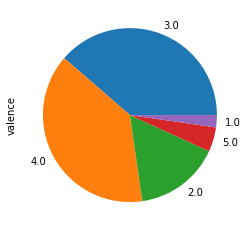

In [9]:
df.valence.value_counts().plot(kind='pie')

Histogram

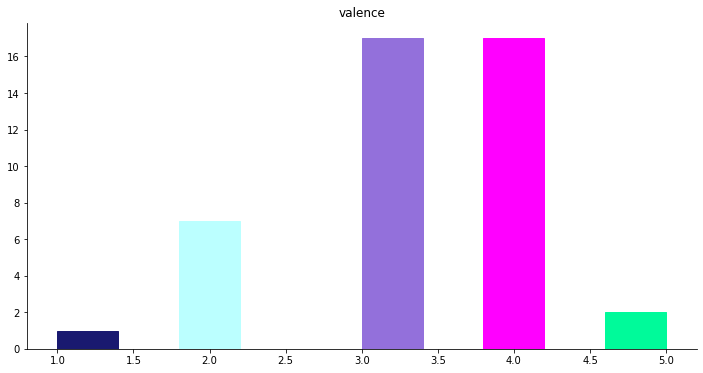

In [10]:
# Plot and retrieve the axes
axes = df.hist(figsize=(12,6), sharex=True, sharey=True)

# Define a different color for the first three bars
colors = ["#191970", "#BBFFFF", "#9370DB", "#FF00FF", "#00FA9A"]

for i, ax in enumerate(axes.reshape(-1)):
    # Define a counter to ensure that if we have more than three bars with a value,
    # we don't try to access out-of-range element in colors
    k = 0

    # Optional: remove grid, and top and right spines
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for rect in ax.patches:
        # If there's a value in the rect and we have defined a color
        if rect.get_height() > 0 and k < len(colors):
            # Set the color
            rect.set_color(colors[k])
            # Increment the counter
            k += 1

plt.show()

**-Visualizations with Seaborn: statistical data visualization**

Heatmap

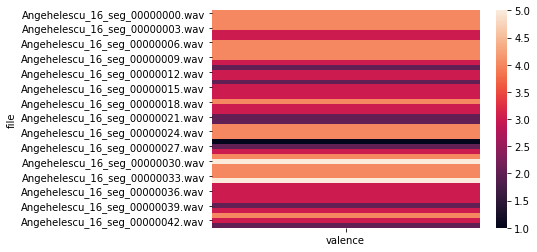

In [11]:
ax = sns.heatmap(df)

Violinplot

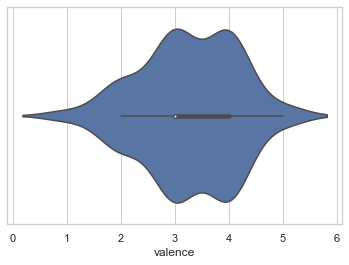

In [12]:
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df.valence)

**- Measure the fundamental frequency F0 using Praat scripts (Feinberg)**

In [13]:
df_f0 = pd.read_pickle('meanf0.pkl') #the values for the fundamental frequencies have been measured in another notebook and added to a zip file

In [14]:
#function that changes the relative path to an absolute path

def norm_df(df):
    df = df.rename(columns={'voiceID': 'file'})
    df = df.set_index('file')
    df.index = df.index.to_series().apply(lambda x: os.path.basename(x))
    return df

In [15]:
df_f0 = norm_df(df_f0)

In [16]:
df_f0

,meanF0Hz
file,
Angehelescu_16_seg_00000000.wav,257.5500934222959
Angehelescu_16_seg_00000001.wav,255.23146682279332
Angehelescu_16_seg_00000002.wav,227.51245777976092
Angehelescu_16_seg_00000003.wav,250.0043037901158
Angehelescu_16_seg_00000004.wav,232.0011873353515
Angehelescu_16_seg_00000005.wav,250.4288879032285
Angehelescu_16_seg_00000006.wav,252.29848603584227
Angehelescu_16_seg_00000007.wav,268.5230016370887
Angehelescu_16_seg_00000008.wav,258.1267938872558


In [17]:
df_f0 = df_f0.astype(float) #the column meanF0 has initially the type string, we convert it to float (numbers) in order to use it in the visualizations

In [18]:
df_mean = df.join(df_f0) #create a new data frame with the initial values (valence) and the fundamental frequency

In [19]:
df_mean.head(2)

,valence,meanF0Hz
file,,
Angehelescu_16_seg_00000000.wav,4.0,257.550093
Angehelescu_16_seg_00000001.wav,4.0,255.231467


**- Correlation between the valence and the fundamental frequency F0** - different visualizations

Scatter plot

<AxesSubplot:xlabel='valence', ylabel='meanF0Hz'>

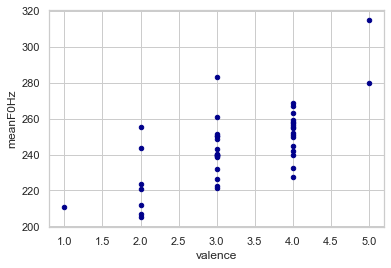

In [20]:
df_mean.plot.scatter(y='meanF0Hz', x='valence', c='DarkBlue')

In [21]:
#df_mean.plot.area(y='meanF0Hz', x='valence')

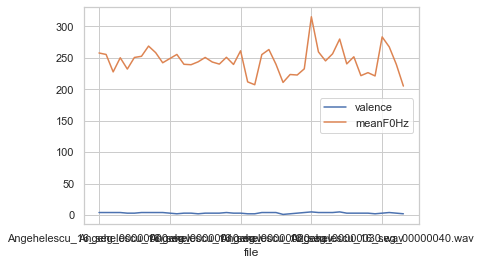

In [22]:
#plt.figure();

df_mean.plot();

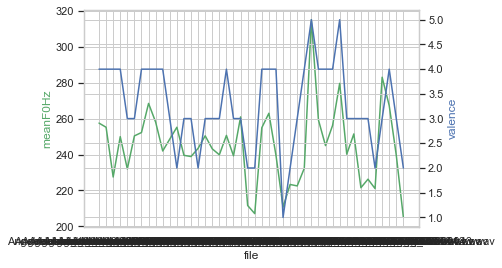

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_mean.index, df_mean.meanF0Hz, 'g-')
ax2.plot(df_mean.index, df_mean.valence, 'b-')

ax1.set_xlabel('file')
ax1.set_ylabel('meanF0Hz', color='g')
ax2.set_ylabel('valence', color='b')

#plt.xlim((240,250))

plt.show()


Histogram

<Figure size 432x288 with 0 Axes>

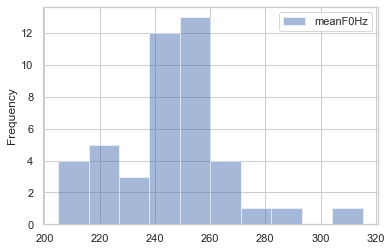

In [24]:
plt.figure();
df_mean.plot.hist(y='meanF0Hz', x='valence',alpha=0.5);

Seaborn - bivariate KDE plot

<Figure size 432x288 with 0 Axes>

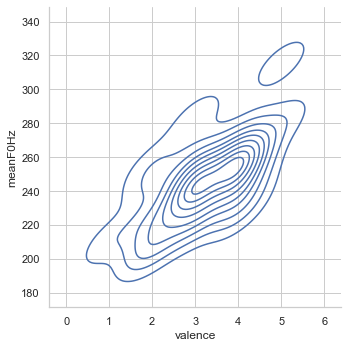

In [25]:
plt.figure()
sns.displot(df_mean, y="meanF0Hz", x="valence",  kind="kde")

<ipython-input-26-a18574b47b2a>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


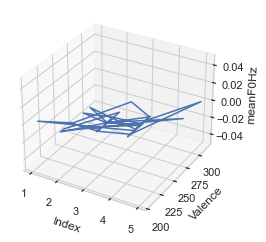

In [26]:
threedee = plt.figure().gca(projection='3d')
threedee.set_xlabel('Index')
threedee.set_ylabel('Valence')
threedee.set_zlabel('meanF0Hz')
threedee.plot(df_mean.valence,df_mean.meanF0Hz)
plt.show()

**- Other characteristics of the voice** - measured using Praat scripts (Feinberg)


In [27]:
measures_df = pd.read_pickle('df_werte.pkl') #the values for the other characteristics of the voice have been measured in anothe notebook and added to a zip file

In [28]:
measures_df = norm_df(measures_df) #change the relative path to an absolute path

In [29]:
measures_df0 = measures_df.astype(float) #the columns are initially strings, they have to be converted to floats(numbers)

In [30]:
df_all = df.join(measures_df) #create a new data frame with all the characteristics that have been measured 

In [31]:
df['speaker'] = 'irina' #add a new column with the name of the speaker to the initial data frame

In [32]:
df ['sex'] = 'female' #add a new column with the gender of the speaker to the initial data frame

In [33]:
df.head(1)

,valence,speaker,sex
file,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female


In [34]:
measures_df.head(1)

,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,f2_median,f3_median,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,0.012469,0.033158,0.125781,...,1669.06461,2695.226546,3890.653335,0.034499,1128.602727,2189.947411,1724.09935,16.25867,1100.541549,15.901262


In [35]:
df_all = df.join(measures_df) #merge the initial data frame with the one that contains the new characteristics 

In [36]:
df_all.head(1)

,valence,speaker,sex,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,...,f2_median,f3_median,f4_median,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
file,,,,,,,,,,,,,,,,,,,,,
Angehelescu_16_seg_00000000.wav,4.0,irina,female,4.28,253.775735,21.862605,9.477288,0.020626,0.000081,0.011053,...,1669.06461,2695.226546,3890.653335,0.034499,1128.602727,2189.947411,1724.09935,16.25867,1100.541549,15.901262


In [37]:
df_all.shape

(44, 33)

In [38]:
df_all.to_pickle('anghelescu_df.pkl') #save the data frame in the computer as a zip file 

**- Box Plots** - correlation between valence and the other parameters that have been measured

c:\users\user\s_sprechstile\s_sprechstile\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

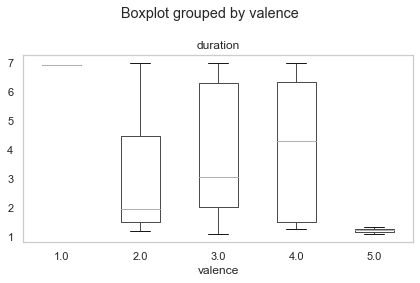

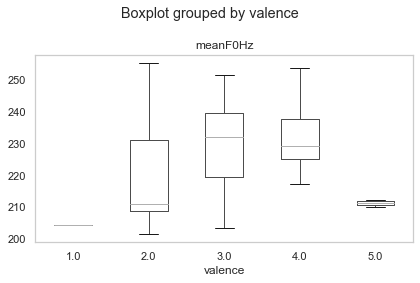

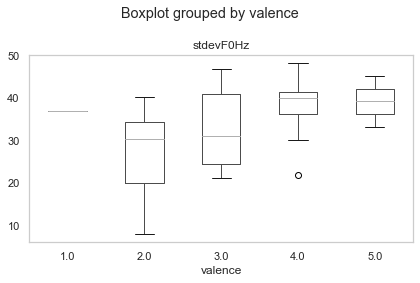

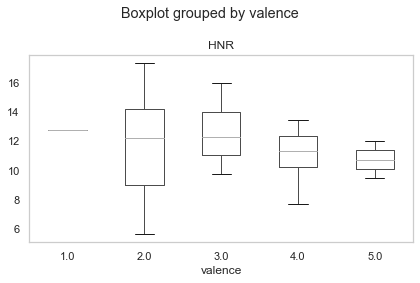

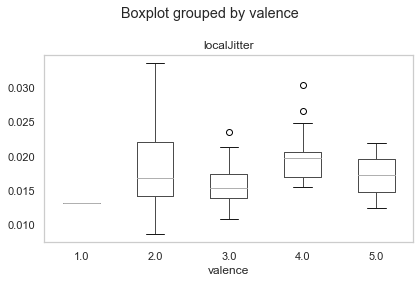

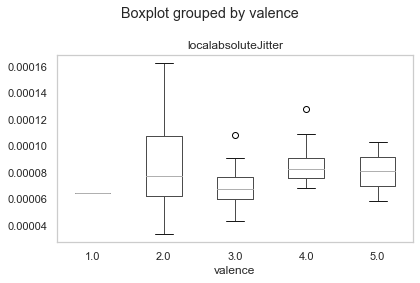

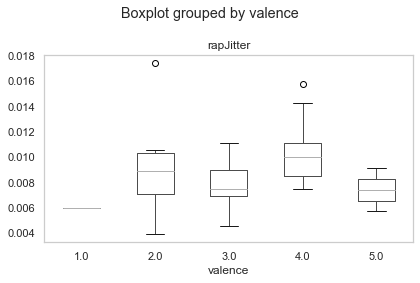

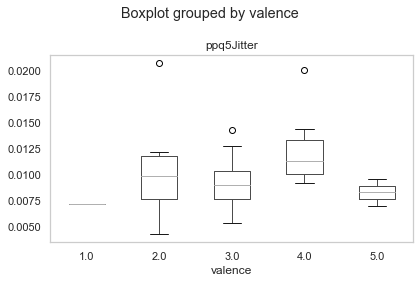

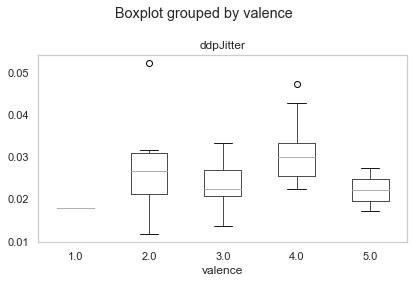

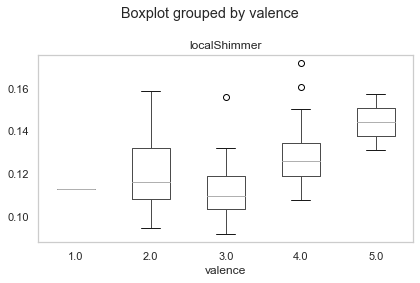

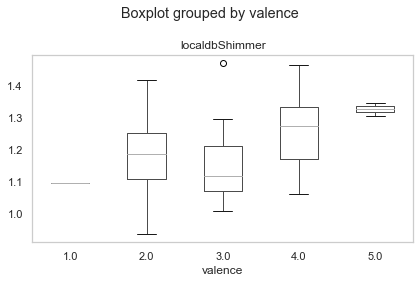

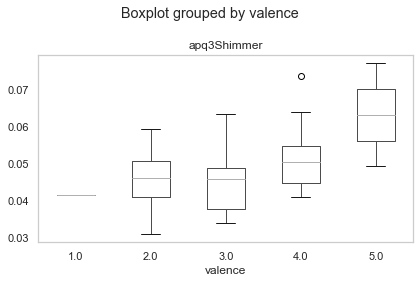

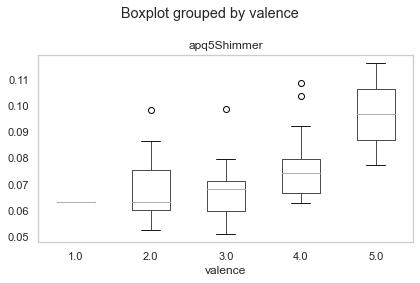

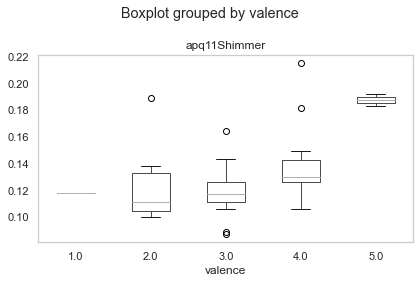

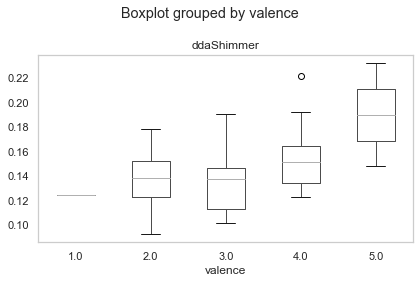

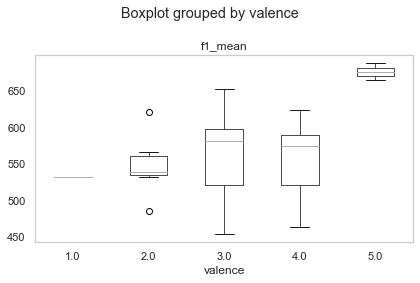

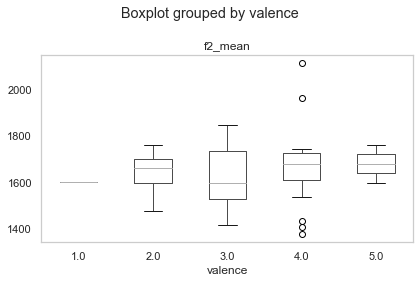

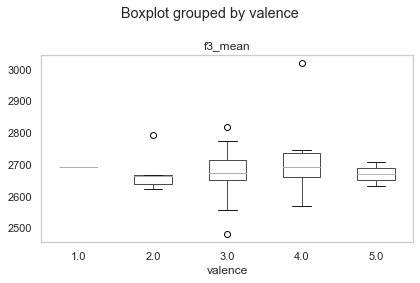

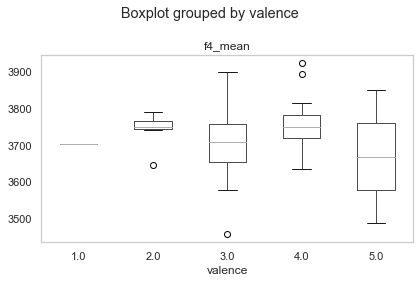

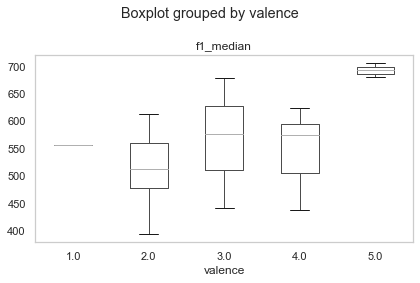

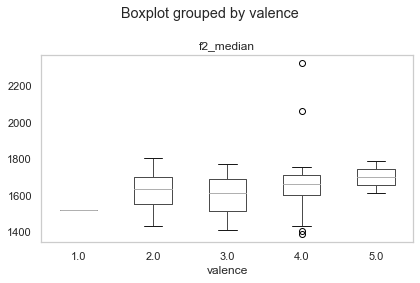

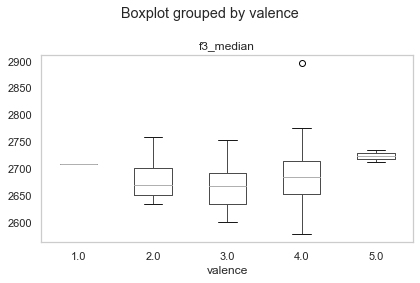

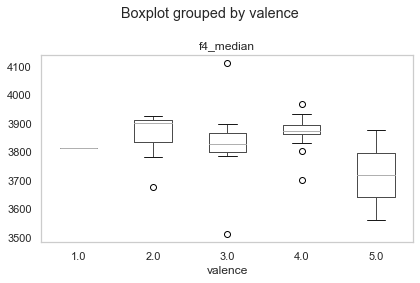

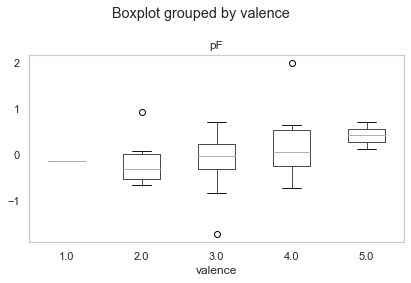

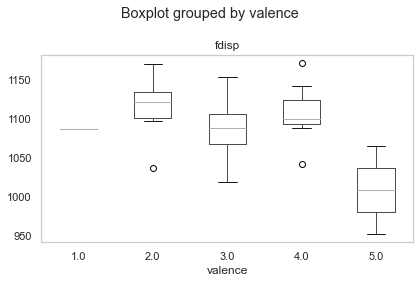

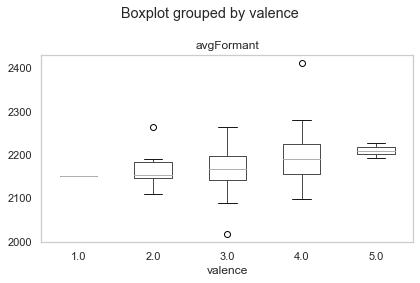

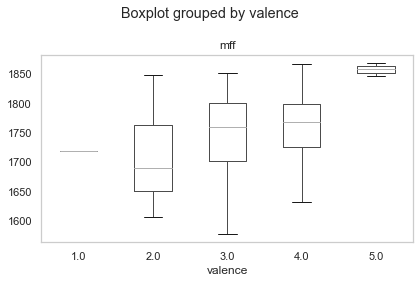

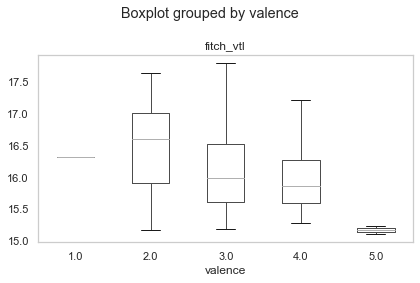

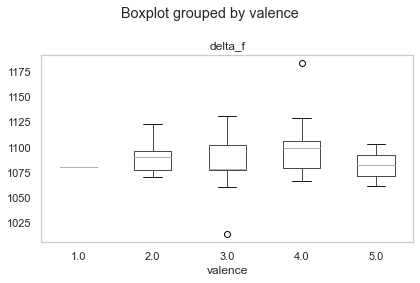

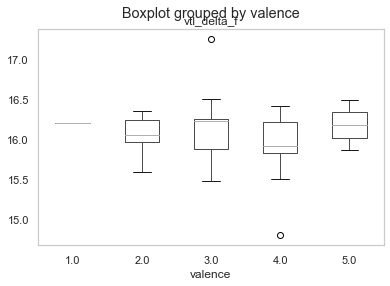

In [39]:
for i, col in enumerate(df_all.iloc[:,3:].columns):
    
    #print(col)
    
    plt.tight_layout() 
    df_all.boxplot(by ='valence', column = col, grid = False)

**-Calculate Pearson correlation coefficient and p-value for every measured characteristic of the voice**

In [40]:
#The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed


pearsons = []
for i, col in enumerate(df_all.iloc[:,3:].columns):
    if np.isnan(df_all[col]).any():
        print('{} includes {} nan, I\'ll insert mean values'.format(col,df_all[col].isna().sum())) #removing the "nan" values
        df_all[col] = df_all[col].fillna(df_all[col].mean())
    r, p = pearsonr(df_all['valence'], df_all[col])
    pearsons.append({'val':col, 'pcc':round(r, 3), 'p-val':round(p, 3)})

In [41]:
df_all.iloc[:,3:].columns

Index(['duration', 'meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter',
       'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
       'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer',
       'apq11Shimmer', 'ddaShimmer', 'f1_mean', 'f2_mean', 'f3_mean',
       'f4_mean', 'f1_median', 'f2_median', 'f3_median', 'f4_median', 'pF',
       'fdisp', 'avgFormant', 'mff', 'fitch_vtl', 'delta_f', 'vtl_delta_f'],
      dtype='object')

In [42]:
sorted(pearsons, key=lambda x: -x['pcc'])

[{'val': 'stdevF0Hz', 'pcc': 0.413, 'p-val': 0.005},
 {'val': 'apq11Shimmer', 'pcc': 0.41, 'p-val': 0.006},
 {'val': 'apq3Shimmer', 'pcc': 0.405, 'p-val': 0.006},
 {'val': 'ddaShimmer', 'pcc': 0.405, 'p-val': 0.006},
 {'val': 'localdbShimmer', 'pcc': 0.385, 'p-val': 0.01},
 {'val': 'apq5Shimmer', 'pcc': 0.374, 'p-val': 0.012},
 {'val': 'mff', 'pcc': 0.355, 'p-val': 0.018},
 {'val': 'localShimmer', 'pcc': 0.333, 'p-val': 0.027},
 {'val': 'f1_median', 'pcc': 0.285, 'p-val': 0.061},
 {'val': 'pF', 'pcc': 0.271, 'p-val': 0.075},
 {'val': 'f1_mean', 'pcc': 0.269, 'p-val': 0.077},
 {'val': 'avgFormant', 'pcc': 0.256, 'p-val': 0.093},
 {'val': 'f2_median', 'pcc': 0.211, 'p-val': 0.17},
 {'val': 'localJitter', 'pcc': 0.204, 'p-val': 0.185},
 {'val': 'ppq5Jitter', 'pcc': 0.198, 'p-val': 0.198},
 {'val': 'rapJitter', 'pcc': 0.194, 'p-val': 0.206},
 {'val': 'ddpJitter', 'pcc': 0.194, 'p-val': 0.206},
 {'val': 'meanF0Hz', 'pcc': 0.177, 'p-val': 0.251},
 {'val': 'f3_median', 'pcc': 0.157, 'p-val': 